In [1]:
from rdkit import Chem
from rdkit.Chem import Draw
drugbank_input = Chem.SDMolSupplier('../data/drugbank.sdf')
drugbank = [m for m in drugbank_input if m]

In [2]:
from rdkit.Chem.Scaffolds import MurckoScaffold

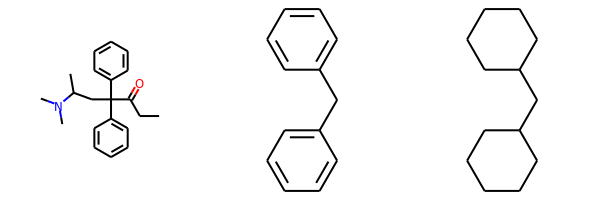

In [7]:
basic_structure = drugbank[222]
atomic_scaffold = MurckoScaffold.GetScaffoldForMol(basic_structure)
atomic_scaffold.Compute2DCoords()
graph_scaffold = MurckoScaffold.MakeScaffoldGeneric(atomic_scaffold)
Draw.MolsToGridImage([basic_structure, atomic_scaffold, graph_scaffold])

In [16]:
drugbank_graph_scaffolds = []
for i in drugbank:
    drugbank_atomic_scaffolds.append(MurckoScaffold.GetScaffoldForMol(i))
for s in drugbank_atomic_scaffolds:
    s.Compute2DCoords()

In [23]:
borked = []
def genericize_scaffold(s):
    try:
        return MurckoScaffold.MakeScaffoldGeneric(s)
    except ValueError:
        borked.append(s)
        return None
drugbank_graph_scaffolds = [genericize_scaffold(s) for s in drugbank_atomic_scaffolds]

In [47]:
smiles = []
dir_scaffold = []
for s in drugbank_atomic_scaffolds:
    smiles.append(Chem.MolToSmiles(s))
for smile in smiles:
    if smile not in dir_scaffold:
        number = smiles.count(smile)
        dir_scaffold.append([smile, number])